## Gradiente Descendente 

Método para encontrar el óptimo de la solución de algún problema. En machine learning, usualmente, se utiliza para encontrar el valor mínimo de una función de costo.

### Un poco de teoría 

Se define una regresión lineal de forma matricial:

<font size="5"> $ \hat y = h_{\theta}(X) = \theta^{T}*X;$ </font>

Donde $\theta$ son los parámetros

Definimos un función de costo, que es la que se va a buscar minimizar. Para este caso usaremos el MSE

<font size="4"> $ MSE = \sum \frac{(\bar y - y)^{2}}{n}$ </font>

<font size="4"> $ MSE(X,h_{ \theta}) = \frac{1}{n} \sum (\theta^{T}*X^{(i)} - y^{(i)})^{2}$ </font>

De la ecuación de la regresión se va a calcular las derivadas parciales para cada parámetro $\theta_{i}$ en simultaneo:

<font size="4"> $ \frac{\partial}{\partial\theta_{j}}MSE(X,h_{ \theta}) = \frac{2}{n} \sum (\theta^{T}*X^{(i)} - y^{(i)})*x_{j}$ </font>

Luego se debe actualizar cada parámetro $\theta$ con lo obtenido de la gradiente, adicionando una learning rate. Considerar que el primer valor de $\theta$ será random o 0.

**Learning rate($\eta$):** ratio de aprendizaje de la gradiente descendiente, nos indica que tan largos son los pasos entre cada iteración

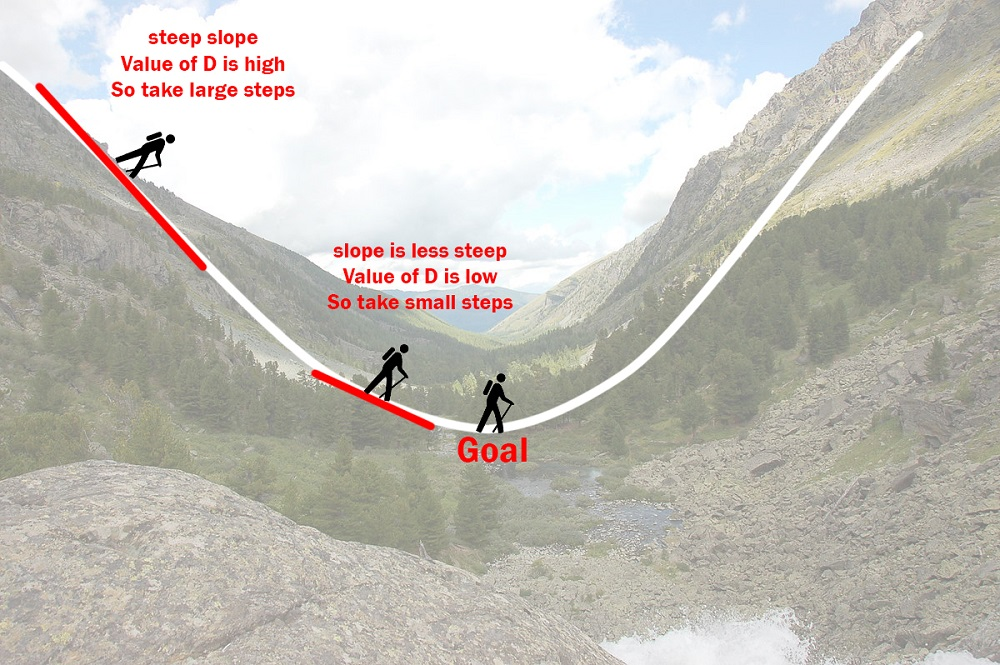

Actualización de $\theta$

<font size="4"> $ \theta^{i+1} = \theta^{i} - \eta*\bigtriangledown_{\theta}MSE(\theta)$ </font>

Una vez obtenido el nuevo valor de $\theta$ comparamos el error y seguimos iterando hasta que el error sea muy pequeño (depende del valor de error que restrinjas) o la gradiente converja.

### Interpretación gráfica 

La gradiente se va aproximando a un minimo local en cada iteración, va a depender del tamaño del learning rate la velocidad de convergencia.

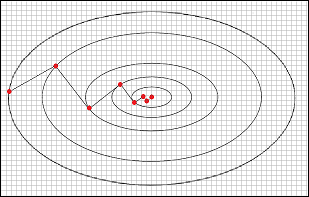

### Desventajas

No siempre converje al minimo global, puede quedarse en un minimo local o punto silla.

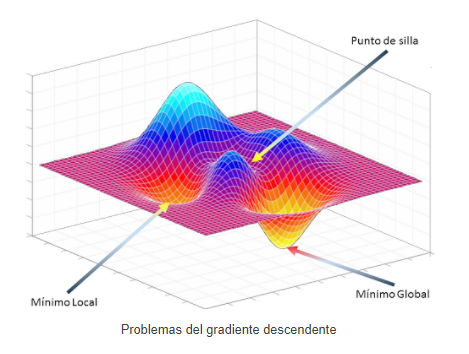

El learning rate hay que elegirlo apropiadamente ya que si es muy pequeño, va a demorar mucho en converger y si es muy grande puede que nunca converja.

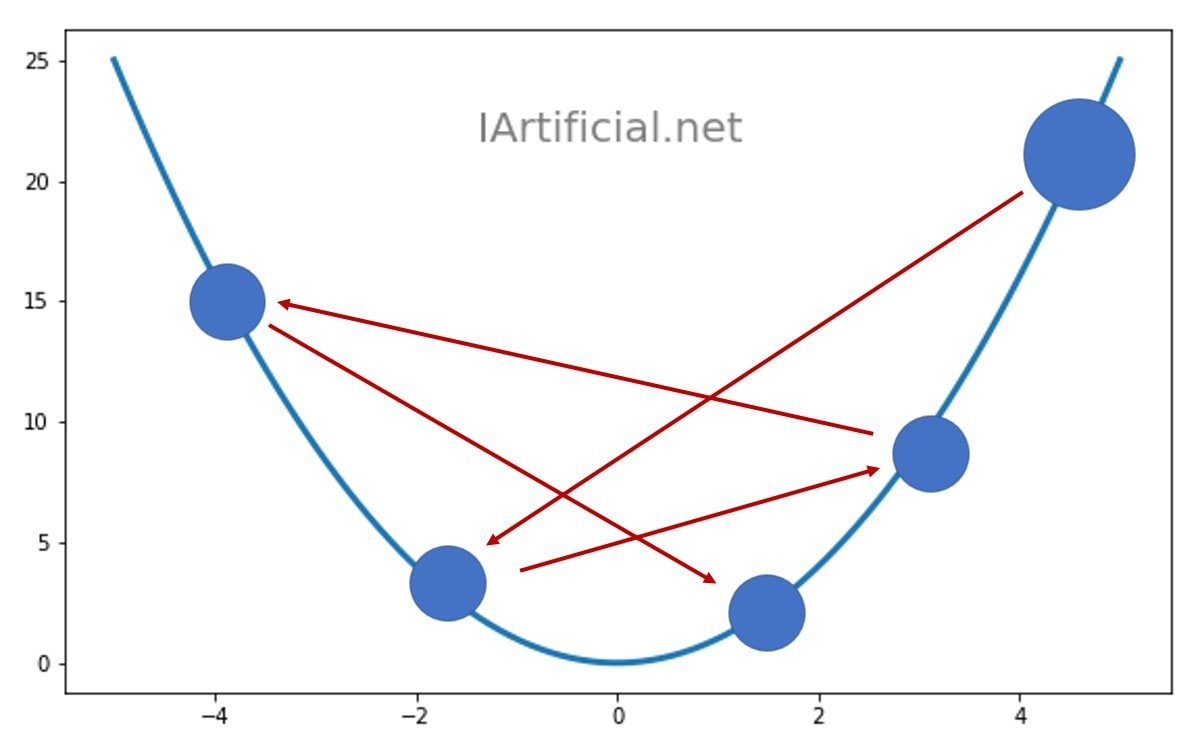

Lo antes mencionado es la gradiente descendente más sencilla, en la actualidad hay muchas mejoras y ajustes que se pueden hacer. Por ejm: hacer el learning rate dinámico, gradiente descendente estocástico, etc.

## Implementando la gradiente descendente 

A modo de ejemplo, usaremos el dataset de london para la regresión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Se implementará la gradiente descendiente sin mayor pre procesamiento de los datos, buscando un modelo simple.

In [2]:
base = load_boston()
base_x=pd.DataFrame(base.data, columns= base.feature_names)
base_y=pd.DataFrame(base.target, columns=['MEDV'])

Se recomienda estandarizar las variables para un mejor rendimiento de la gradiente descendente

**Estandarización de min y max**

<font size="5"> $x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$ </font>

In [3]:
base_x=base_x.apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [4]:
base_x=sm.add_constant(base_x)

In [5]:
base_x.describe()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.0,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.0,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,1.0,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,1.0,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Separamos el datset en prueba y entrenamiento.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(base_x, base_y, test_size=0.3, random_state=21)

**Implementación:**

 Se construye la función de costo

In [7]:
def costo_gd(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.square(np.subtract(predictions,y)))
    return cost

Creando los parámetros necesarios

In [8]:
#Se crean vectores para guardar los valores del costo y theta en cada iteración
theta_history = []
cost_history = []

#definimos parámetros
lr = 0.1 # learning rate
n_iterations = 5000 # total de itaraciones
col_names=base_x.columns.to_list()
n=len(col_names) # número de variables
tol=10**(-4) # tolerancia

tamanio=len(y_train) # tamaño de muestras
theta_gd = np.random.randn(n,1)#generando theta random

lógica de la gradiente descendente

In [9]:
for i in range(n_iterations):    
    gradients = 2/tamanio * X_train.T.dot(np.subtract(X_train.dot(theta_gd),y_train)) # se calcula las gradientes
    theta_gd = theta_gd - lr*gradients # actualiza los valores de los theta
    costo=costo_gd(theta_gd, X_train, y_train) # se calcula el costo
    theta_history.append(theta_gd.T) # guardamos un theta histórico
    cost_history.append(costo_gd(theta_gd, X_train, y_train)) # guardamos el costo histórico
    if i !=0:
        if abs(cost_history[-2][0]-costo[0])<tol:
            break

**Convergencia de los parámetros $\theta$**

Números de iteraciones:  2377
el valor del costo previo es:  19.920555003257157
el valor del costo es:  19.920455026104534


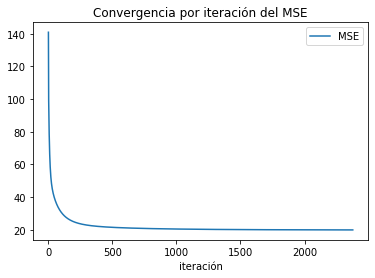

In [10]:
mse_df = pd.DataFrame(cost_history).reset_index()
mse_df.columns = ['iteración', 'MSE']
mse_df.plot(x='iteración', y='MSE', kind='line')
plt.title("Convergencia por iteración del MSE")
print("Números de iteraciones: ",len(cost_history)-1)
print("el valor del costo previo es: ",cost_history[-2][0])
print("el valor del costo es: ",cost_history[-1][0])

**Valores de $\theta$**

In [11]:
theta_gd.T

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,25.347753,-6.888688,5.080456,0.571797,2.103287,-7.926721,18.299483,0.37903,-14.075782,7.4592,-6.944318,-9.576883,5.13733,-18.55225


**Predicción**

In [12]:
prediccion_1=X_test.dot(theta_gd)

In [13]:
print("Mean squared error: " ,mean_squared_error(y_test, prediccion_1))
print('r2 score:', r2_score(y_test, prediccion_1))

Mean squared error:  27.471975399892585
r2 score: 0.712704621999833


### Ejercicio 

1. Hallar otra regresión con menos variables, tratando de mejorar el MSE

2. Optimizar el código de gradiente descendente. ¿Que otra forma de validación de optimización del costo implementaría? ¿Cómo hago que el código se ejecute con mayor velocidad?

### links de información 

https://technotes.netlify.app/python/_site/posts/2019-08-22-gradiente-descendente/

https://numerentur.org/gradiente-descendente/

https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/

https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/Linear%20Regression%20using%20Gradient%20Descent.ipynb